# 27th of June, 2018
## Benjamin Adam Catching
## Andino Lab Rotation
## Poliovirus DIP Project

Test data has been received, generously sent from Christian from the Abate lab. Three image files are included; brightfield, GFP, and Cy5. Cy5 reports cell tracker dye that is diffuse through the cell cytoplasm and the GFP reports nuclear intercalating dye called Sytox. Sytox only permeates dead cells, so the cells displaying both Cy5 and GFP are dead.  

This image dataset will be useful to practice creating a pipeline that can:  
1. Identify wells  
2. Identify cells in each well  
3. Sort cells into live (Cy5) and dead (GFP). Quantifying this data will be useful for virus infection.  

In [1]:
# Import packages

# Data modification
import glob
import numpy as np

# Visualization packages
import matplotlib.pyplot as plt
import seaborn as sns
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.color

sns.set(style='dark', palette=sns.color_palette(), rc={'axes.labelsize': 20}, font_scale=2)

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

In [3]:
# Define the location of the image files
wells_bright = "../data/test_data/10x_livedead-2_TRANS.tif"
wells_cy5 = "../data/test_data/10x_livedead-2_CY5.tif"
wells_rfp = "../data/test_data/10x_livedead-2_GFP.tif"

In [5]:
# Read in the images
image_bright = skimage.io.imread(wells_bright)
image_cy5 = skimage.io.imread(wells_cy5)
image_rfp = skimage.io.imread(wells_rfp)

In [11]:
# Overlay the images
image_overlay = np.dstack(3 * [image_bright / image_bright.max()])
image_overlay[image_rfp, 0] = 1.0
image_overlay[image_cy5, 1] = 1.0

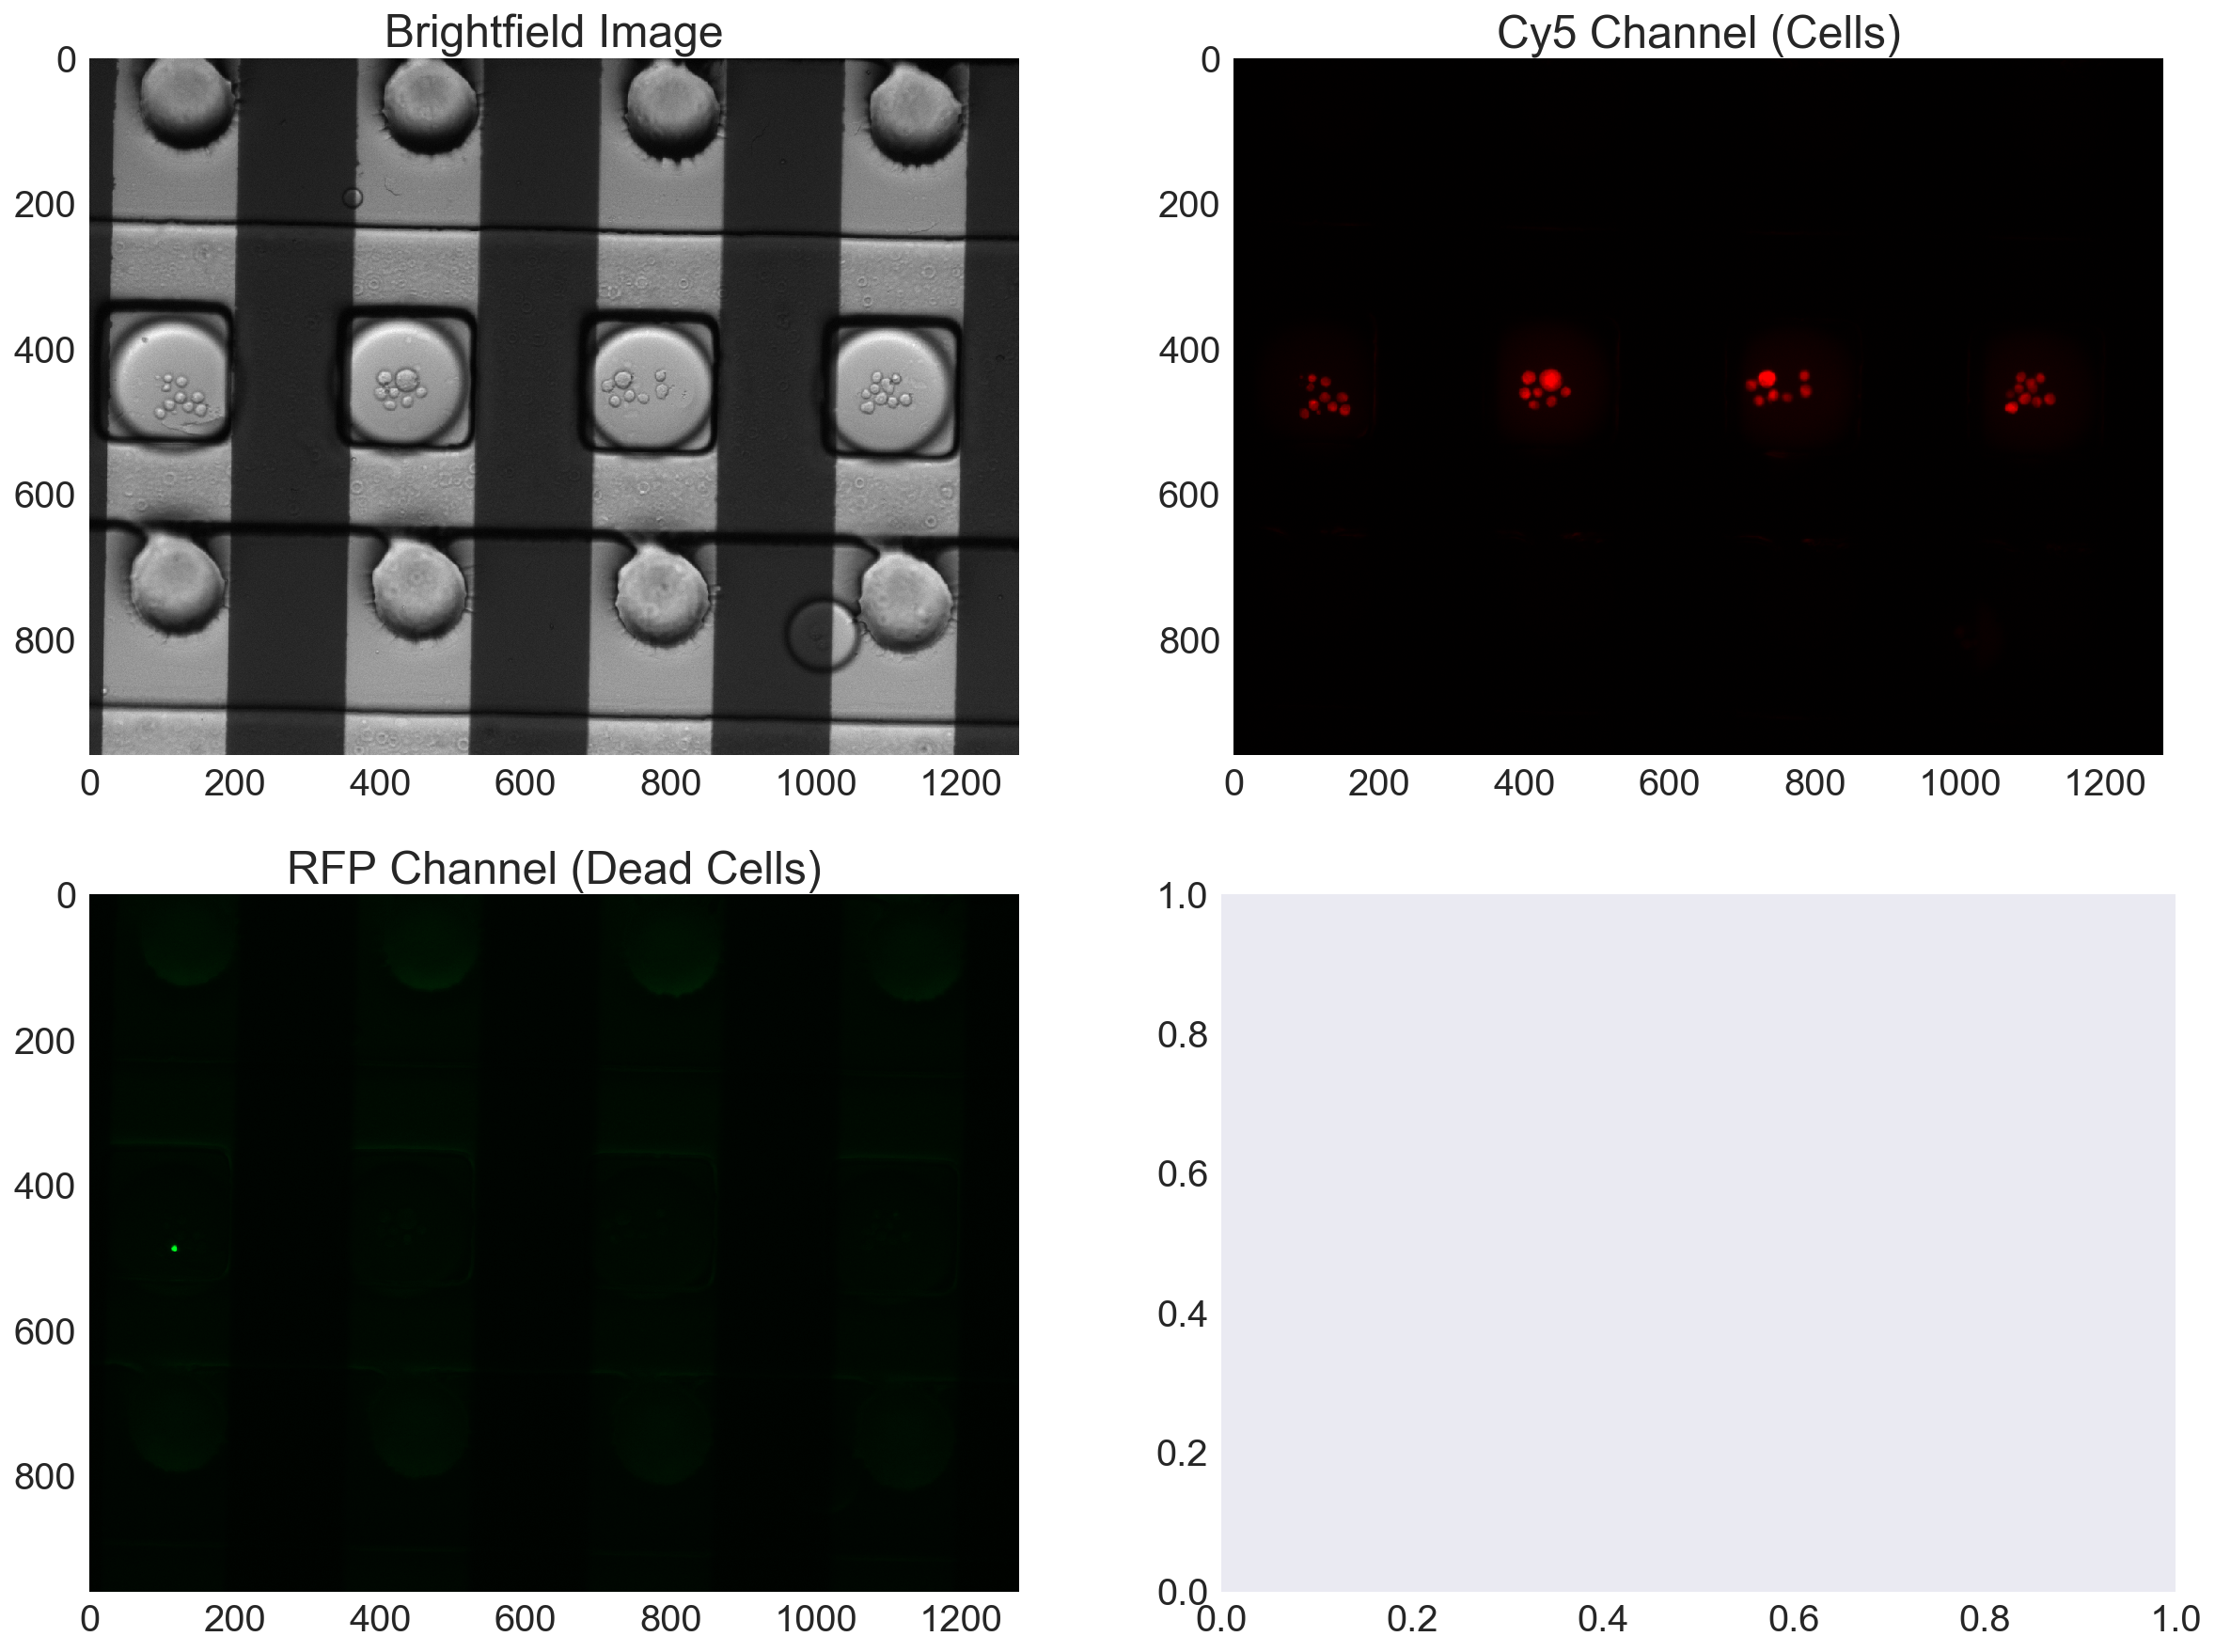

In [25]:
# Display the image, set Seaborn style 'dark' to avoid grid lines
with sns.axes_style('dark'):
    fig, ax = plt.subplots(2, 2, figsize=(20, 15))
    ax[0, 0].imshow(image_bright, cmap=plt.cm.gray)
    ax[0, 0].set_title('Brightfield Image')
    
    ax[0, 1].imshow(image_cy5)
    ax[0, 1].set_title('Cy5 Channel (Cells)')
    
    ax[1, 0].imshow(image_rfp)
    ax[1, 0].set_title('RFP Channel (Dead Cells)')
    
    #ax[1, 1].imshow(image_overlay)
plt.show()